# Cells integration - Mareckova + Tan + Wang + GarciaAlonso + Fonseca + Huang

In [1]:
import sys

#if branch is stable, will install via pypi, else will install from source
branch = "stable"
IN_COLAB = "google.colab" in sys.modules

if IN_COLAB and branch == "stable":
    !pip install --quiet scvi-tools[tutorials]
elif IN_COLAB and branch != "stable":
    !pip install --quiet --upgrade jsonschema
    !pip install --quiet git+https://github.com/yoseflab/scvi-tools@$branch#egg=scvi-tools[tutorials]

In [2]:
 palette = ["#E31A1C", "#1F78B4", "#A6CEE3",  "#B2DF8A", "#33A02C", "#FB9A99",  "#FDBF6F", "#FF7F00", "#CAB2D6", "#6A3D9A", "#FFFF99", "#B15928", "#66C2A5",
               "#FC8D62", "#8DA0CB", "#B3B3B3", "#A6D854", "#FFD92F", "#E5C494", "#E78AC3",
           '#f90492', '#f7d048', '#098474', '#505ba7', '#927306', '#6a5247']

#### Set up scVI environment

In [3]:
import scvi
import scanpy as sc

sc.set_figure_params(figsize=(4, 4))

In [4]:
import pandas as pd 
import numpy as np
import anndata as ad

# Read in dataset
## Cells Tang

In [5]:
data_dir = '/nfs/team292/lg18/endometriosis/raw_objects/'

cellsTan = sc.read(data_dir+'/cells_Tan_endometrium_rawcounts.h5ad')
cellsTan.X.shape

(44164, 28221)

## Cells Mareckova

In [6]:
data_dir = '/nfs/team292/lg18/endometriosis/raw_objects/'

cellsMareckova2 = sc.read(data_dir+'/cells_rawcounts.h5ad')
cellsMareckova2 = cellsMareckova2[['doublet' not in i for i in cellsMareckova2.obs.genotype]]
cellsMareckova2.X.shape

(86607, 29973)

In [7]:
data_dir = '/nfs/team292/lg18/endometriosis/raw_objects/'

cellsCBTM = sc.read(data_dir+'/cells_CBTM_rawcounts.h5ad')
cellsCBTM = cellsCBTM[[ i in ['A70'] for i in cellsCBTM.obs.genotype ]]
cellsCBTM.obs['Group'] = 'Ctrl_whole_uterus'
cellsCBTM.X.shape

Trying to set attribute `.obs` of view, copying.


(13844, 26444)

In [8]:
data_dir = '/nfs/team292/lg18/endometriosis/raw_objects/'

cellsSE06 = sc.read(data_dir+'/cells_SE06_rawcounts.h5ad')
cellsSE06.obs['Group'] = 'Ctrl_Superficial'
cellsSE06.X.shape

(1500, 22208)

In [9]:
cellsMareckova = ad.concat([cellsCBTM, cellsMareckova2, cellsSE06], join="outer")

## Cells GarciaAlonso

In [10]:
data_dir = '/nfs/team292/lg18/endometriosis/raw_objects/'

cellsGarciaAlonso = sc.read(data_dir+'/cells_GarciaAlonso_rawcounts.h5ad')
cellsGarciaAlonso.X.shape

(48933, 26669)

## Cells Wang

In [11]:
data_dir = '/nfs/team292/lg18/endometriosis/raw_objects/'

cellsWang = sc.read(data_dir+'/cells_Wang_rawcounts.h5ad')
cellsWang.X.shape

(77613, 29072)

## Cells Fonseca

In [12]:
data_dir = '/nfs/team292/lg18/endometriosis/raw_objects/'

cellsFonseca = sc.read(data_dir+'/cells_FonsecaEndometrium_rawcounts.h5ad')
# cellsFonseca = cellsFonseca[[ i not in ['Menopause_Hormones'] cellsFonseca.obs.Stage ]]
cellsFonseca.X.shape

(29811, 23675)

## Cells Huang

In [13]:
data_dir = '/nfs/team292/lg18/endometriosis/raw_objects/'

cellsHuang = sc.read(data_dir+'/cells_Huang_rawcounts.h5ad')
cellsHuang.X.shape

(90587, 28649)

## Cells Lai

In [14]:
data_dir = '/nfs/team292/lg18/endometriosis/raw_objects/'

cellsLai = sc.read(data_dir+'/cells_Lai_rawcounts.h5ad')
cellsLai = cellsLai[[ i not in ['Secretory_RIF'] for i in cellsLai.obs['Binary Stage'] ]]
cellsLai.obs['Group'] = 'Ctrl_Superficial'
cellsLai.X.shape

Trying to set attribute `.obs` of view, copying.


(13287, 20278)

## Remove cc genes detected in cells adata

In [15]:
ccgs = cellsTan.uns['ccgs'].tolist() + cellsGarciaAlonso.uns['ccgs'].tolist() + cellsHuang.uns['ccgs'].tolist()

cellsMareckova = cellsMareckova[:,[i not in ccgs for i in cellsMareckova.var_names]]
print('Total number of genes after ccg filter: {:d}'.format(cellsMareckova.n_vars))

cellsTan = cellsTan[:,[i not in ccgs for i in cellsTan.var_names]]
print('Total number of genes after ccg filter: {:d}'.format(cellsTan.n_vars))

cellsGarciaAlonso = cellsGarciaAlonso[:,[i not in ccgs for i in cellsGarciaAlonso.var_names]]
print('Total number of genes after ccg filter: {:d}'.format(cellsGarciaAlonso.n_vars))

cellsWang = cellsWang[:,[i not in ccgs for i in cellsWang.var_names]]
print('Total number of genes after ccg filter: {:d}'.format(cellsWang.n_vars))

cellsHuang = cellsHuang[:,[i not in ccgs for i in cellsHuang.var_names]]
print('Total number of genes after ccg filter: {:d}'.format(cellsHuang.n_vars))

cellsFonseca = cellsFonseca[:,[i not in ccgs for i in cellsFonseca.var_names]]
print('Total number of genes after ccg filter: {:d}'.format(cellsFonseca.n_vars))

cellsLai = cellsLai[:,[i not in ccgs for i in cellsLai.var_names]]
print('Total number of genes after ccg filter: {:d}'.format(cellsLai.n_vars))

Total number of genes after ccg filter: 30203
Total number of genes after ccg filter: 28082
Total number of genes after ccg filter: 26530
Total number of genes after ccg filter: 28933
Total number of genes after ccg filter: 28510
Total number of genes after ccg filter: 23536
Total number of genes after ccg filter: 20140


## Merge datasets

In [35]:
cellsMareckova.obs['dataset'] = 'Mareckova'
cellsTan.obs['dataset'] = 'Tan'
cellsWang.obs['dataset'] = 'Wang'
cellsGarciaAlonso.obs['dataset'] = 'GarciaAlonso'
cellsHuang.obs['dataset'] = 'Huang'
cellsFonseca.obs['dataset'] = 'Fonseca'
cellsLai.obs['dataset'] = 'Lai'
adata = cellsMareckova.concatenate([ cellsGarciaAlonso, cellsWang, cellsTan, cellsFonseca, cellsHuang, cellsLai], 
                    batch_key = 'dataset', 
                    batch_categories = ['Mareckova', 'GarciaAlonso', 'Wang', 'Tan', 'Fonseca', 'Huang', 'Lai'], 
                                  join = 'inner')

In [37]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
print('Total number of donors: {:d}'.format(len(set(adata.obs.genotype))))
print('Total number of samples: {:d}'.format(len(set(adata.obs['sample']))))
adata.obs['dataset'].value_counts()

Total number of cells: 406346
Total number of genes: 17736
Total number of donors: 64
Total number of samples: 90


Mareckova       101951
Huang            90587
Wang             77613
GarciaAlonso     48933
Tan              44164
Fonseca          29811
Lai              13287
Name: dataset, dtype: int64

In [38]:
set(adata.obs.Group)

{'Ctrl_Superficial', 'Ctrl_whole_uterus', 'Endo_Superficial', 'Lesion_Ovarian'}

In [39]:
adata = adata[[ i in ['Endo_Superficial', 'Ctrl_Superficial', 'Ctrl_whole_uterus'] for i in adata.obs.Group ]]
adata = adata[[ i not in ['Myometrium'] for i in adata.obs.Tissue ]]

In [42]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
print('Total number of donors: {:d}'.format(len(set(adata.obs.genotype))))
print('Total number of samples: {:d}'.format(len(set(adata.obs['sample']))))
adata.obs['dataset'].value_counts()

Total number of cells: 390867
Total number of genes: 17736
Total number of donors: 63
Total number of samples: 87


Mareckova       94323
Huang           90587
Wang            77613
Tan             44164
GarciaAlonso    41082
Fonseca         29811
Lai             13287
Name: dataset, dtype: int64

In [41]:
set(adata.obs.dataset)

{'Fonseca', 'GarciaAlonso', 'Huang', 'Lai', 'Mareckova', 'Tan', 'Wang'}

## Subset EPITHELIALS

In [43]:
annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium.csv',index_col=0)
annot_df.head()

/opt/conda/envs/scvi-singularity/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (5,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,39,40,41,42,43,46,47,55,58,59,60,62,63) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


n_genes  \
HCA_A_RepT_RNA13247830_AAACCTGAGCGATGAC-Mareckova     1981   
HCA_A_RepT_RNA13247830_AAACCTGAGCTAGGCA-Mareckova     3492   
HCA_A_RepT_RNA13247830_AAACCTGAGGCAGTCA-Mareckova     4832   
HCA_A_RepT_RNA13247830_AAACCTGCACCAACCG-Mareckova     2967   
HCA_A_RepT_RNA13247830_AAACCTGCACCTGGTG-Mareckova     2597   

                                                                   sample  \
HCA_A_RepT_RNA13247830_AAACCTGAGCGATGAC-Mareckova  HCA_A_RepT_RNA13247830   
HCA_A_RepT_RNA13247830_AAACCTGAGCTAGGCA-Mareckova  HCA_A_RepT_RNA13247830   
HCA_A_RepT_RNA13247830_AAACCTGAGGCAGTCA-Mareckova  HCA_A_RepT_RNA13247830   
HCA_A_RepT_RNA13247830_AAACCTGCACCAACCG-Mareckova  HCA_A_RepT_RNA13247830   
HCA_A_RepT_RNA13247830_AAACCTGCACCTGGTG-Mareckova  HCA_A_RepT_RNA13247830   

                                                                  library  \
HCA_A_RepT_RNA13247830_AAACCTGAGCGATGAC-Mareckova  HCA_A_RepT_RNA13247830   
HCA_A_RepT_RNA13247830_AAACCTGAGCTAGGCA-Mareckova  HCA_A_RepT_RNA13247830   
HCA_A_RepT_RNA13247830_AAACCTGAGGCAGTCA-Mareckova  HCA_A_RepT_RNA13247830   
HCA_A_RepT_RNA13247830_AAACCTGCACCAACCG-Mareckova  HCA_A_RepT_RNA13247830   
HCA_A_RepT_RNA13247830_AAACCTGCACCTGGTG-Mareckova  HCA_A_RepT_RNA13247830   

                                                  StudyName  \
HCA_A_RepT_RNA13247830_AAACCTGAGCGATGAC-Mareckova      CBTM   
HCA_A_RepT_RNA13247830_AAACCTGAGCTAGGCA-Mareckova      CBTM   
HCA_A_RepT_RNA13247830_AAACCTGAGGCAGTCA-Mareckova      CBTM   
HCA_A_RepT_RNA13247830_AAACCTGCACCAACCG-Mareckova      CBTM   
HCA_A_RepT_RNA13247830_AAACCTGCACCTGGTG-Mareckova      CBTM   

                                                                 SampleID  \
HCA_A_RepT_RNA13247830_AAACCTGAGCGATGAC-Mareckova  HCA_A_RepT_RNA13247830   
HCA_A_RepT_RNA13247830_AAACCTGAGCTAGGCA-Mareckova  HCA_A_RepT_RNA13247830   
HCA_A_RepT_RNA13247830_AAACCTGAGGCAGTCA-Mareckova  HCA_A_RepT_RNA13247830   
HCA_A_RepT_RNA13247830_AAACCTGCACCAACCG-Mareckova  HCA_A_RepT_RNA13247830   
HCA_A_RepT_RNA13247830_AAACCTGCACCTGGTG-Mareckova  HCA_A_RepT_RNA13247830   

                                                   Lane Processing   Type  \
HCA_A_RepT_RNA13247830_AAACCTGAGCGATGAC-Mareckova   0.0      Fresh  Cells   
HCA_A_RepT_RNA13247830_AAACCTGAGCTAGGCA-Mareckova   0.0      Fresh  Cells   
HCA_A_RepT_RNA13247830_AAACCTGAGGCAGTCA-Mareckova   0.0      Fresh  Cells   
HCA_A_RepT_RNA13247830_AAACCTGCACCAACCG-Mareckova   0.0      Fresh  Cells   
HCA_A_RepT_RNA13247830_AAACCTGCACCTGGTG-Mareckova   0.0      Fresh  Cells   

                                                    BiopsyType BiopsyType_II  \
HCA_A_RepT_RNA13247830_AAACCTGAGCGATGAC-Mareckova  Organ_Donor           NaN   
HCA_A_RepT_RNA13247830_AAACCTGAGCTAGGCA-Mareckova  Organ_Donor           NaN   
HCA_A_RepT_RNA13247830_AAACCTGAGGCAGTCA-Mareckova  Organ_Donor           NaN   
HCA_A_RepT_RNA13247830_AAACCTGCACCAACCG-Mareckova  Organ_Donor           NaN   
HCA_A_RepT_RNA13247830_AAACCTGCACCTGGTG-Mareckova  Organ_Donor           NaN   

                                                   ... barcode Tan_celltype  \
HCA_A_RepT_RNA13247830_AAACCTGAGCGATGAC-Mareckova  ...     NaN          NaN   
HCA_A_RepT_RNA13247830_AAACCTGAGCTAGGCA-Mareckova  ...     NaN          NaN   
HCA_A_RepT_RNA13247830_AAACCTGAGGCAGTCA-Mareckova  ...     NaN          NaN   
HCA_A_RepT_RNA13247830_AAACCTGCACCAACCG-Mareckova  ...     NaN          NaN   
HCA_A_RepT_RNA13247830_AAACCTGCACCTGGTG-Mareckova  ...     NaN          NaN   

                                                  Tan_cellsubtypes  \
HCA_A_RepT_RNA13247830_AAACCTGAGCGATGAC-Mareckova              NaN   
HCA_A_RepT_RNA13247830_AAACCTGAGCTAGGCA-Mareckova              NaN   
HCA_A_RepT_RNA13247830_AAACCTGAGGCAGTCA-Mareckova              NaN   
HCA_A_RepT_RNA13247830_AAACCTGCACCAACCG-Mareckova              NaN   
HCA_A_RepT_RNA13247830_AAACCTGCACCTGGTG-Mareckova              NaN   

                                                  Mareckova_celltype  

In [44]:
annot = annot_df['Mareckova_celltype'].to_dict()
adata.obs['Mareckova_celltype'] = adata.obs_names.map(annot)
adata.obs['Mareckova_celltype'].value_counts()

Trying to set attribute `.obs` of view, copying.


Mesen_dS               96529
Mesen_eS               79488
Epithelial_Prolif      32015
Immune_Lymphoid        31498
Epithelial_Glands      28839
Endothelial            23519
Epithelial_P4          16765
Epithelial_Lumen       14253
Epithelial_Horm        11490
Mesen_ePV              11325
Immune_Myeloid         11260
LowQC                   7549
Epithelial_Ciliated     7467
Doublet                 5616
Mesen_mPV               4618
Mesen_uSMCs             2995
Immune                  2958
Epithelial_MUC5B        1748
Mesen_FibC7              539
Epithelial_KRT5          396
Name: Mareckova_celltype, dtype: int64

In [45]:
adata = adata[[ 'Epi' in i for i in adata.obs['Mareckova_celltype'] ]]
adata.obs['Mareckova_celltype'].value_counts()

Epithelial_Prolif      32015
Epithelial_Glands      28839
Epithelial_P4          16765
Epithelial_Lumen       14253
Epithelial_Horm        11490
Epithelial_Ciliated     7467
Epithelial_MUC5B        1748
Epithelial_KRT5          396
Name: Mareckova_celltype, dtype: int64

In [46]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
print('Total number of donors: {:d}'.format(len(set(adata.obs.genotype))))
print('Total number of samples: {:d}'.format(len(set(adata.obs['sample']))))
adata.obs['dataset'].value_counts()

Total number of cells: 112973
Total number of genes: 17736
Total number of donors: 63
Total number of samples: 87


Wang            43785
Mareckova       25362
Huang           23171
Tan             15414
GarciaAlonso     4084
Fonseca          1089
Lai                68
Name: dataset, dtype: int64

### Clean doublets and lowQC

In [47]:
annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium_epithelial.csv',index_col=0)
annot = annot_df['Mareckova_epi_celltype'].to_dict()
adata.obs['Mareckova_epi_celltype'] = adata.obs_names.map(annot)
adata.obs['Mareckova_epi_celltype'].value_counts()

/opt/conda/envs/scvi-singularity/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (5,8,10,11,14,15,16,17,18,19,20,21,22,23,24,25,26,40,41,42,46,47,55,58,59,60) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
Trying to set attribute `.obs` of view, copying.


Hormones                  15028
Glandular_I_WOI           14418
Prolif                    14034
Lumen                     13031
P4induced                 12050
Glandular_II_secretory     8893
LowQC                      8078
Doublet                    7442
Ciliated                   6236
Prolif_Cycling             4542
SOX9_LGR5                  4396
MUC5B                      1573
SOX9_CDH2                  1032
Glandular_III_FGF7          930
Ciliated_pre                707
KRT5                        539
Other                        44
Name: Mareckova_epi_celltype, dtype: int64

In [48]:
adata = adata[[ i not in ['LowQC', 'Doublet', 'Other'] for i in adata.obs['Mareckova_epi_celltype'] ]]
adata.obs['Mareckova_epi_celltype'].value_counts()

Hormones                  15028
Glandular_I_WOI           14418
Prolif                    14034
Lumen                     13031
P4induced                 12050
Glandular_II_secretory     8893
Ciliated                   6236
Prolif_Cycling             4542
SOX9_LGR5                  4396
MUC5B                      1573
SOX9_CDH2                  1032
Glandular_III_FGF7          930
Ciliated_pre                707
KRT5                        539
Name: Mareckova_epi_celltype, dtype: int64

In [49]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
print('Total number of donors: {:d}'.format(len(set(adata.obs.genotype))))
print('Total number of samples: {:d}'.format(len(set(adata.obs['sample']))))
adata.obs['dataset'].value_counts()

Total number of cells: 97409
Total number of genes: 17736
Total number of donors: 63
Total number of samples: 86


Wang            36942
Mareckova       22683
Huang           18753
Tan             14926
GarciaAlonso     3274
Fonseca           812
Lai                19
Name: dataset, dtype: int64

### Clean up futher low QC cells 

In [50]:
adata = adata[[ float(i) > 3000 for i in adata.obs.n_counts  ]]
adata.obs['Mareckova_epi_celltype'].value_counts()

Hormones                  14912
Prolif                    13863
Glandular_I_WOI           12993
Lumen                     12004
P4induced                 11975
Glandular_II_secretory     8654
Ciliated                   5721
Prolif_Cycling             4503
SOX9_LGR5                  4387
MUC5B                      1491
SOX9_CDH2                  1031
Glandular_III_FGF7          787
Ciliated_pre                704
KRT5                        516
Name: Mareckova_epi_celltype, dtype: int64

In [51]:
adata_lowQC = adata[adata[: , 'HBA1'].X > 0, :] 
adata_immune = adata[adata[: , 'PTPRC'].X > 0, :] 

barcodes2keep = list(set(adata.obs.index) - set(adata_lowQC.obs.index)) 
barcodes2keep = list(set(barcodes2keep) - set(adata_immune.obs.index)) 

adata = adata[ barcodes2keep ]
adata.obs['Mareckova_epi_celltype'].value_counts()

Hormones                  14574
Prolif                    13475
Glandular_I_WOI           12812
Lumen                     11769
P4induced                 11638
Glandular_II_secretory     8522
Ciliated                   5523
Prolif_Cycling             4360
SOX9_LGR5                  4272
MUC5B                      1364
SOX9_CDH2                  1013
Glandular_III_FGF7          781
Ciliated_pre                654
KRT5                        493
Name: Mareckova_epi_celltype, dtype: int64

In [52]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
print('Total number of donors: {:d}'.format(len(set(adata.obs.genotype))))
print('Total number of samples: {:d}'.format(len(set(adata.obs['sample']))))
adata.obs['dataset'].value_counts()

Total number of cells: 91250
Total number of genes: 17736
Total number of donors: 63
Total number of samples: 86


Wang            33483
Mareckova       22081
Huang           17685
Tan             14367
GarciaAlonso     2921
Fonseca           695
Lai                18
Name: dataset, dtype: int64

## Identify HVGs - on each dataset independently

!!! Unlike before (at least I think), now they recommend subsetting to highly variable genes before running scVI 

--> the tutorial says anywhere in between 1000 and 10,000 should be fine, so I arbitrarily chose 2000

In [55]:
# Remove Lai as it barely has cells
adata = adata[[ i not in ['Lai'] for i in adata.obs['dataset'] ]]

In [56]:
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=2000,
    subset=False,
    flavor="seurat_v3",
    batch_key="dataset"
)

Trying to set attribute `.uns` of view, copying.


In [57]:
# intersect independent HVGs
# hvg_Mareckova = cellsMareckova.var['highly_variable'].tolist()
# hvg_Tan = cellsTan.var['highly_variable'].tolist()

# hvg_both = [all(tup) for tup in zip(hvg_Mareckova, hvg_Tan)]
# sum(hvg_both)

In [58]:
# use HVGs computed by "dataset"
hvg_both = adata.var['highly_variable'].tolist()
sum(hvg_both)

2000

In [59]:
# subset object for scVI
bdata = adata[:, hvg_both ]
bdata.layers["counts"] = bdata.X.copy() # preserve counts

In [60]:
print('Total number of highly_variable genes: {:d}'.format(bdata.n_vars))

Total number of highly_variable genes: 2000


## Normalize - optional

In [61]:
# sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
# sc.pp.log1p(adata)

## scVI

!!! Here you can specify your covariates you want to correct for

In [62]:
scvi.data.setup_anndata(
    bdata,
    layer="counts",
    batch_key='dataset',
    categorical_covariate_keys=["genotype"]
)

INFO     Using batches from adata.obs["dataset"]                                             
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.layers["counts"]                                              
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 91232 cells, 2000 vars, 6 batches,
         1 labels, and 0 proteins. Also registered 1 extra categorical covariates and 0 extra
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          


In [63]:
model = scvi.model.SCVI(bdata, n_latent= 32, n_layers=2)

In [64]:
model

SCVI Model with the following params: 
n_hidden: 128, n_latent: 32, n_layers: 2, dropout_rate: 0.1, dispersion: gene, 
gene_likelihood: zinb, latent_distribution: normal
Training status: Not Trained

To print summary of associated AnnData, use: scvi.data.view_anndata_setup(model.adata)

In [65]:
model.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 88/88: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 88/88 [10:31<00:00,  7.18s/it, loss=1.29e+03, v_num=1]


In [66]:
latent = model.get_latent_representation()

In [67]:
adata.obsm["X_scVI"] = latent

## Save latent space

In [68]:
# del adata.obs['is_doublet']
# pd.DataFrame(adata.obsm["X_scVI"]).to_csv(data_dir+'/cells_alldatasets_rawcounts_scVI_latentspace.csv')
# adata.write('/nfs/team292/datasets/hugodeca/integrated_female.h5ad')

### Visualization and Clustering

In [69]:
# use scVI latent space for UMAP generation
sc.pp.neighbors(adata, use_rep="X_scVI")
sc.tl.umap(adata, min_dist=0.4)

/opt/conda/envs/scvi-singularity/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'sample' as categorical
/opt/conda/envs/scvi-singularity/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'library' as categorical
/opt/conda/envs/scvi-singularity/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed

/opt/conda/envs/scvi-singularity/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'QC_CellRanger' as categorical
/opt/conda/envs/scvi-singularity/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Sample' as categorical
/opt/conda/envs/scvi-singularity/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be r

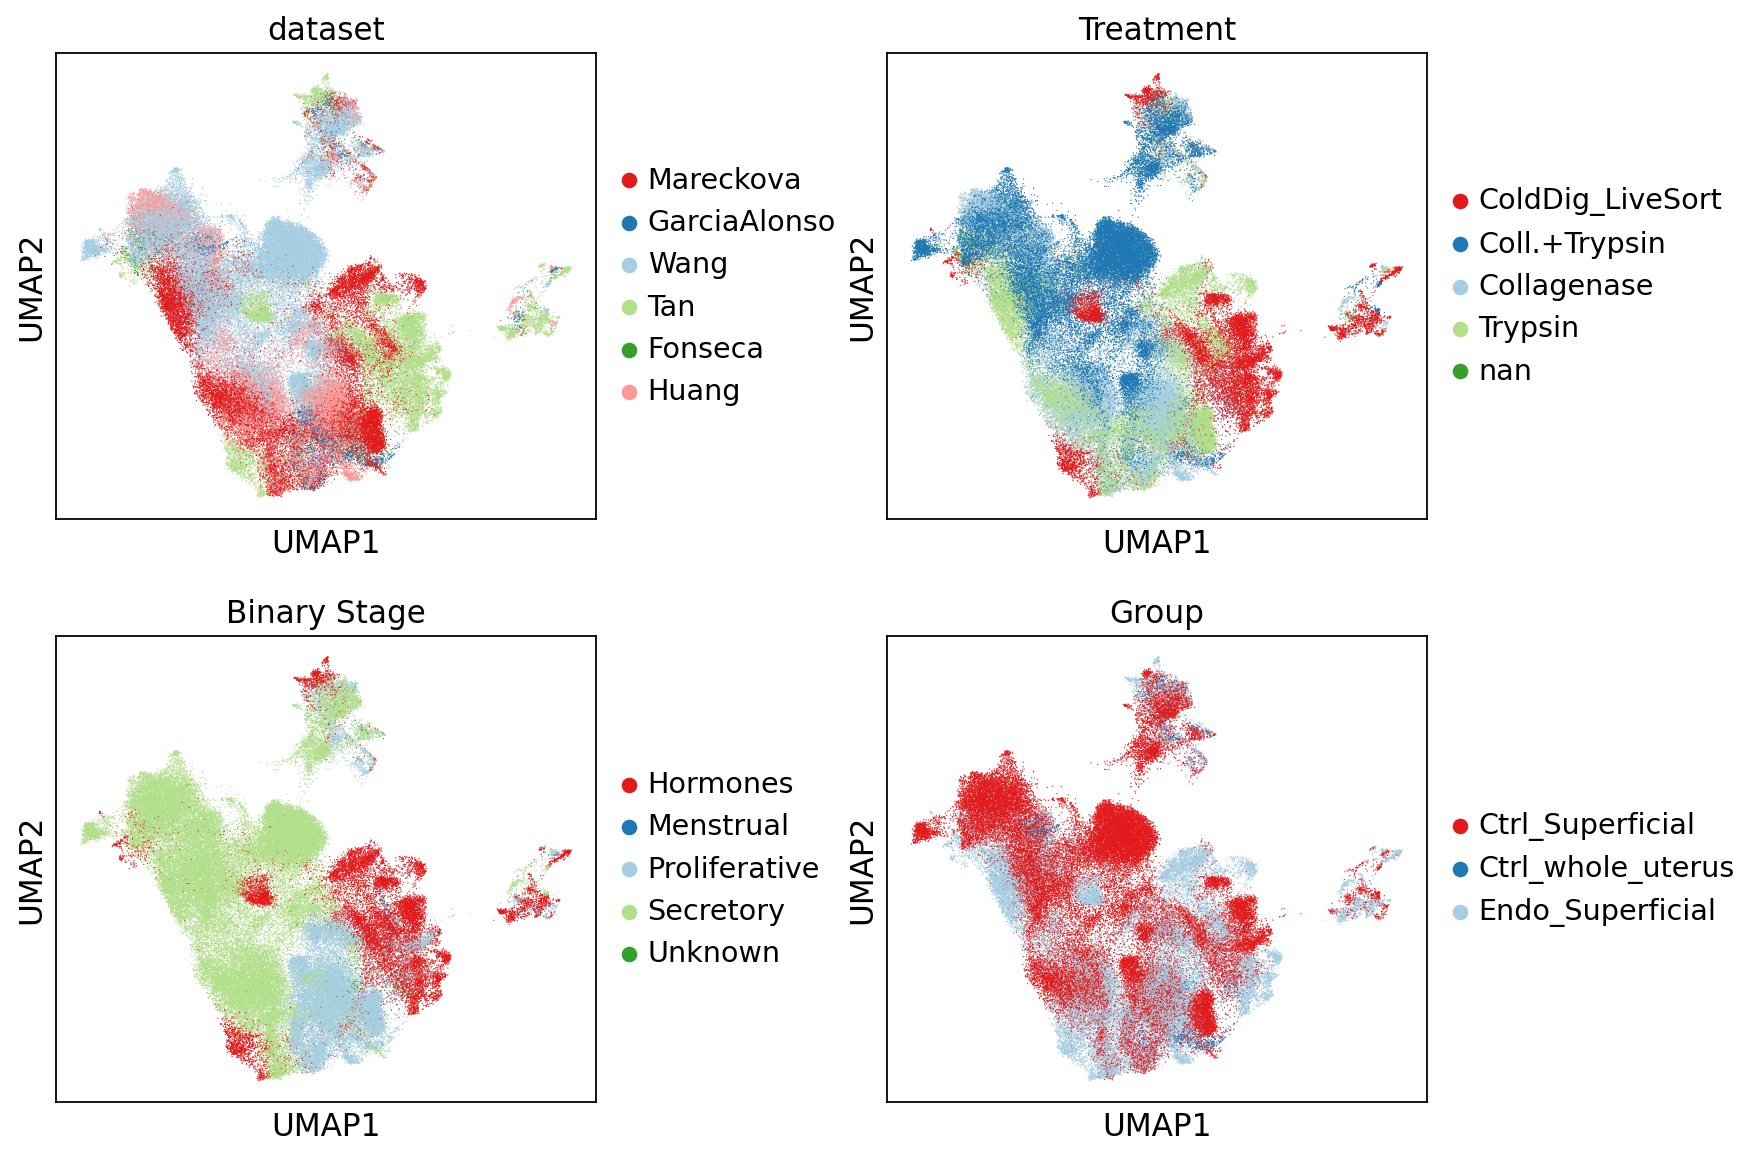

In [70]:
sc.pl.umap(
    adata,
    color=['dataset', 'Treatment', 'Binary Stage', 'Group'], 
    palette = palette,
    frameon=True, ncols = 2, wspace = 0.4
)

In [71]:
sc.pl.umap(
    adata,
    color=['Binary Stage', 'Group', 'Stage', 'Endometriosis_stage'], 
    palette = palette,
    frameon=True, ncols = 2, wspace = 0.5
)

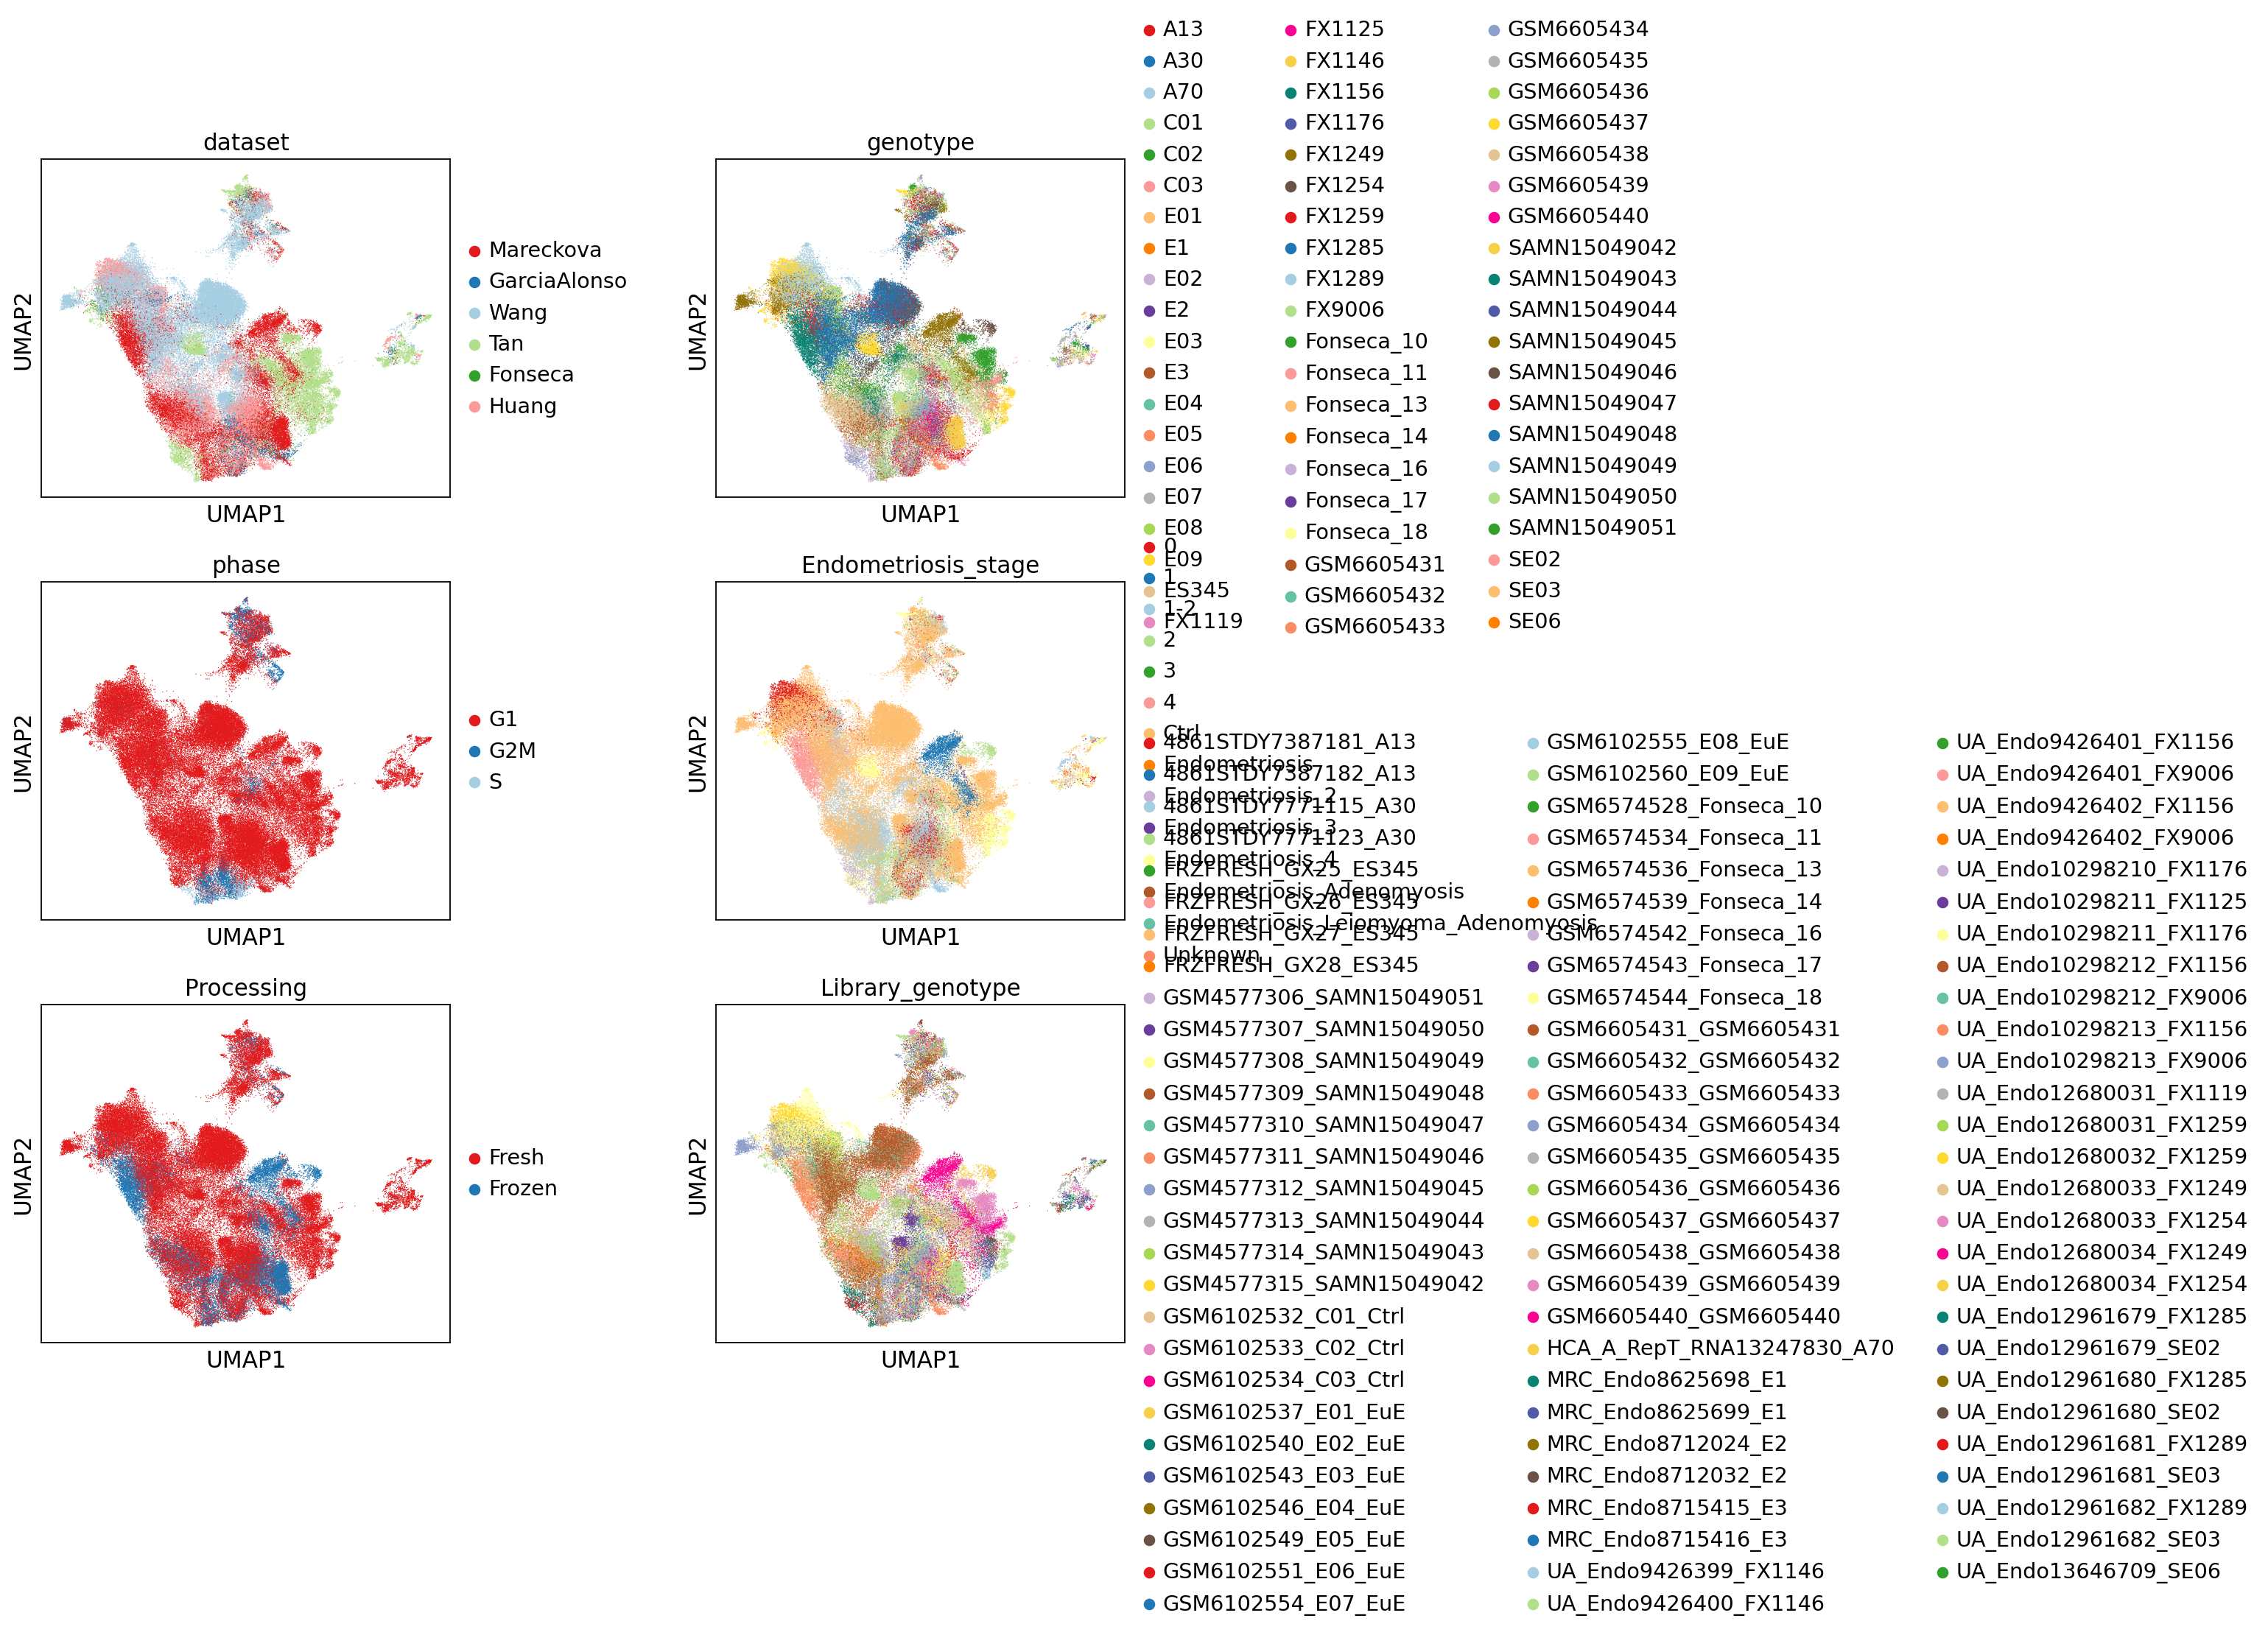

In [72]:
sc.pl.umap(
    adata,
    color=['dataset', 'genotype', "phase", "Endometriosis_stage", 'Processing', 'Library_genotype'], 
    palette = palette,
    frameon=True, ncols = 2, wspace = 0.5
)

In [73]:

adata.obs['Tan_cellsubtypes'] = adata.obs['Tan_cellsubtypes'].astype("str")
adata.obs['GarciaAlonso_celltype'] = adata.obs['GarciaAlonso_celltype'].astype("str")
adata.obs['GarciaAlonso_celltype'] = adata.obs['GarciaAlonso_celltype'].replace('NA', np.NaN)
adata.obs['GarciaAlonso_celltype'] = adata.obs['GarciaAlonso_celltype'].replace('nan', np.NaN)

/opt/conda/envs/scvi-singularity/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'GarciaAlonso_celltype' as categorical
/opt/conda/envs/scvi-singularity/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Tan_cellsubtypes' as categorical


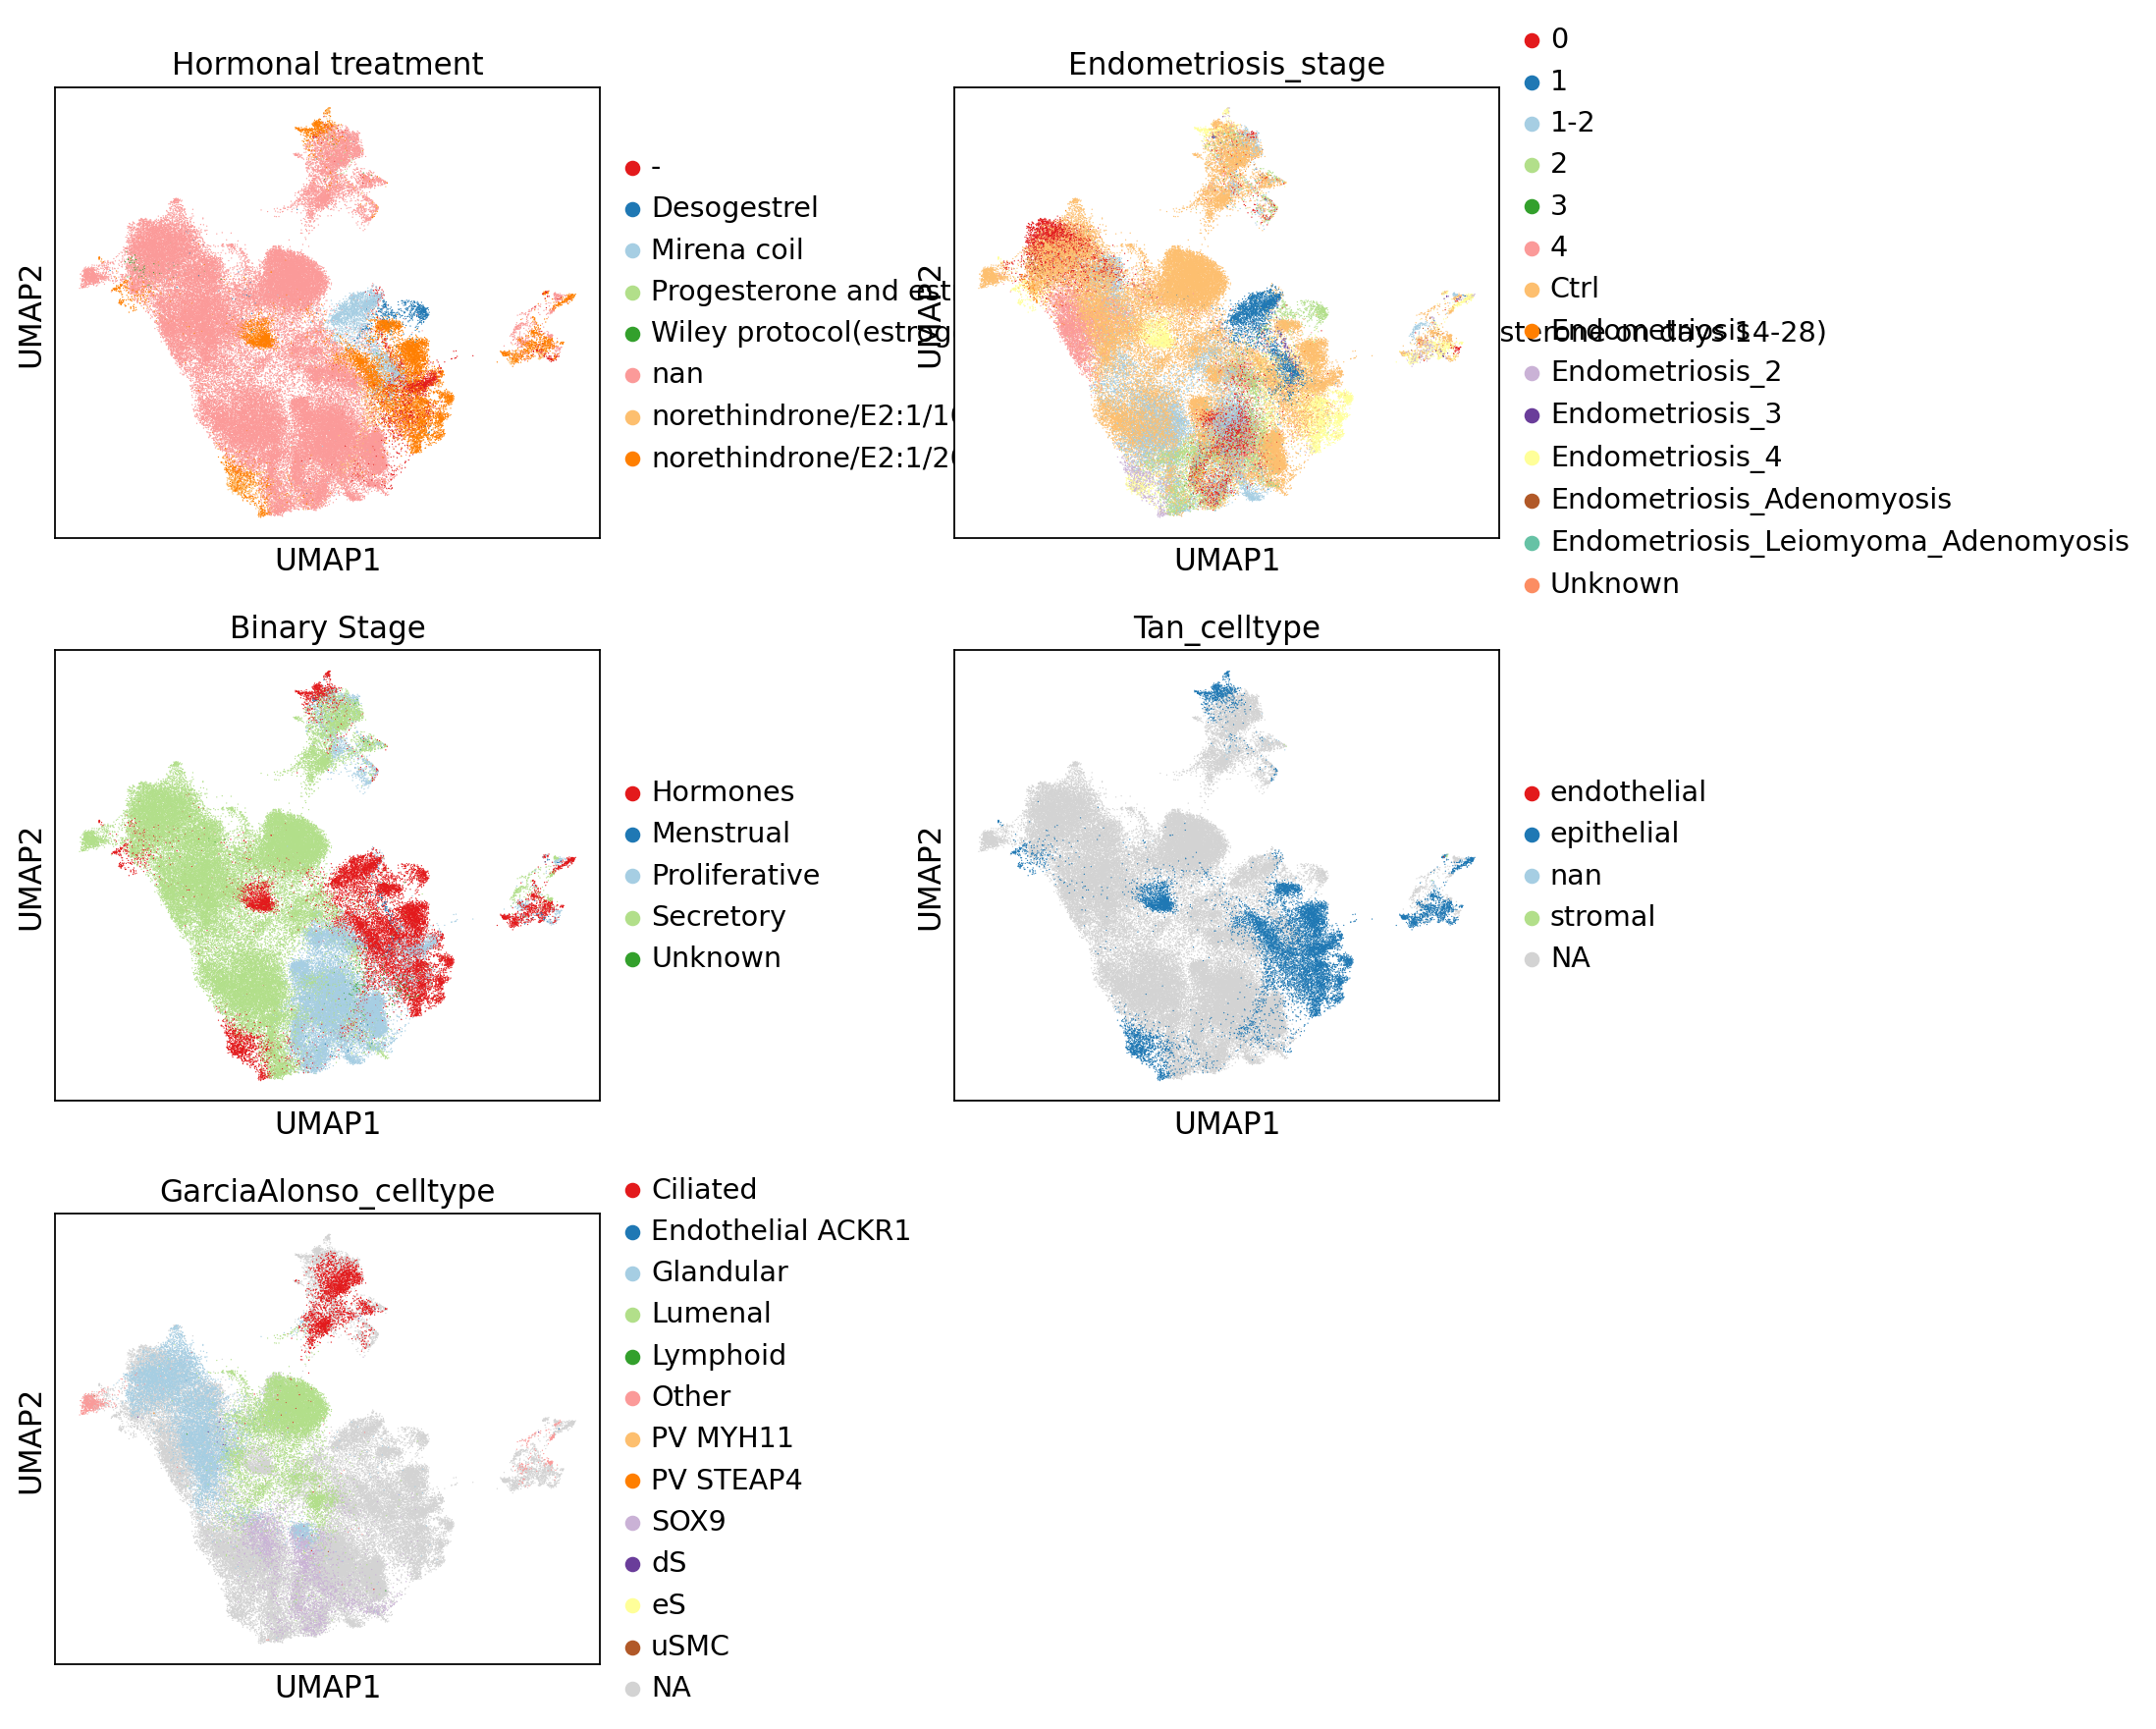

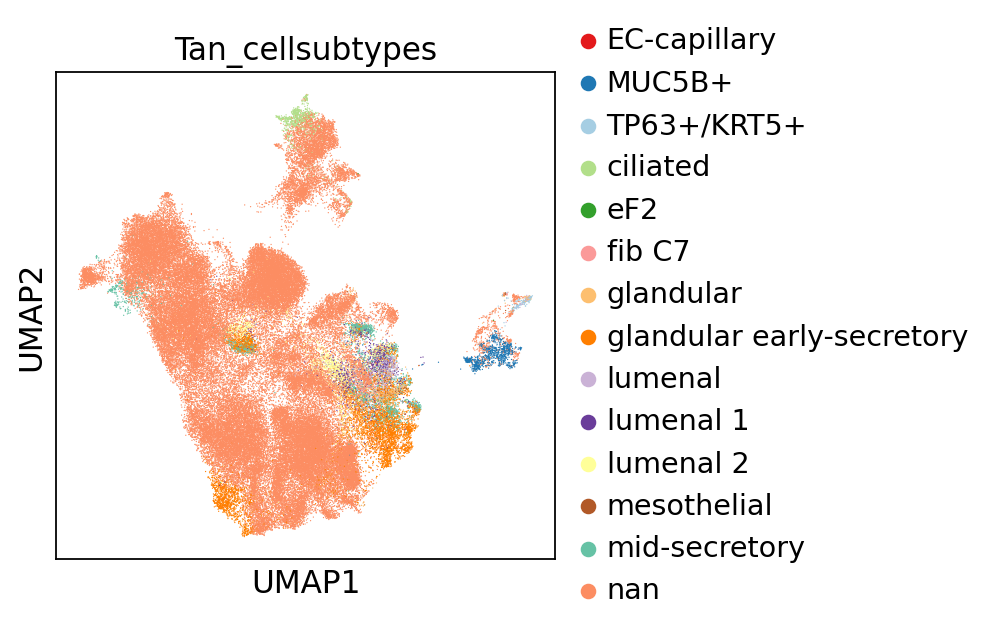

In [74]:
sc.pl.umap(
    adata,
    color=['Hormonal treatment', 'Endometriosis_stage', 'Binary Stage', 'Tan_celltype', 'GarciaAlonso_celltype'], 
    palette = palette,
    frameon=True, ncols = 2, wspace = 0.5
)

sc.pl.umap(
    adata,
    color=['Tan_cellsubtypes'], 
    palette = palette,
    frameon=True, ncols = 2, wspace = 0.5
)

In [75]:
annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium_epithelial_CLEAN.csv',index_col=0)
# annot_df.index = [a + '-' + str(b) for a, b in zip(annot_df.index, annot_df.Type.tolist())]
annot_df.head()

annot = annot_df['Mareckova_epi_celltype'].to_dict()
adata.obs['Mareckova_epi_celltype'] = adata.obs_names.map(annot)
print(adata.obs['Mareckova_epi_celltype'].value_counts())

Hormones                 10674
Lumen_late                9059
Glandular_a_WOI           8794
Prolif                    6877
P4_induced                6318
Glandular_b_secretory     5490
Prolif_cycling            3263
Lumen_early               2061
Prolif_SOX9_CDH2          1672
Prolif_SOX9_LGR5          1216
Doublet                    979
Hormones_secretory         960
MUC5B                      914
Glandular_c_FGF7           747
Hormones_WIF1              563
KRT5                       359
LowQC                       95
Name: Mareckova_epi_celltype, dtype: int64


/opt/conda/envs/scvi-singularity/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Mareckova_epi_celltype' as categorical


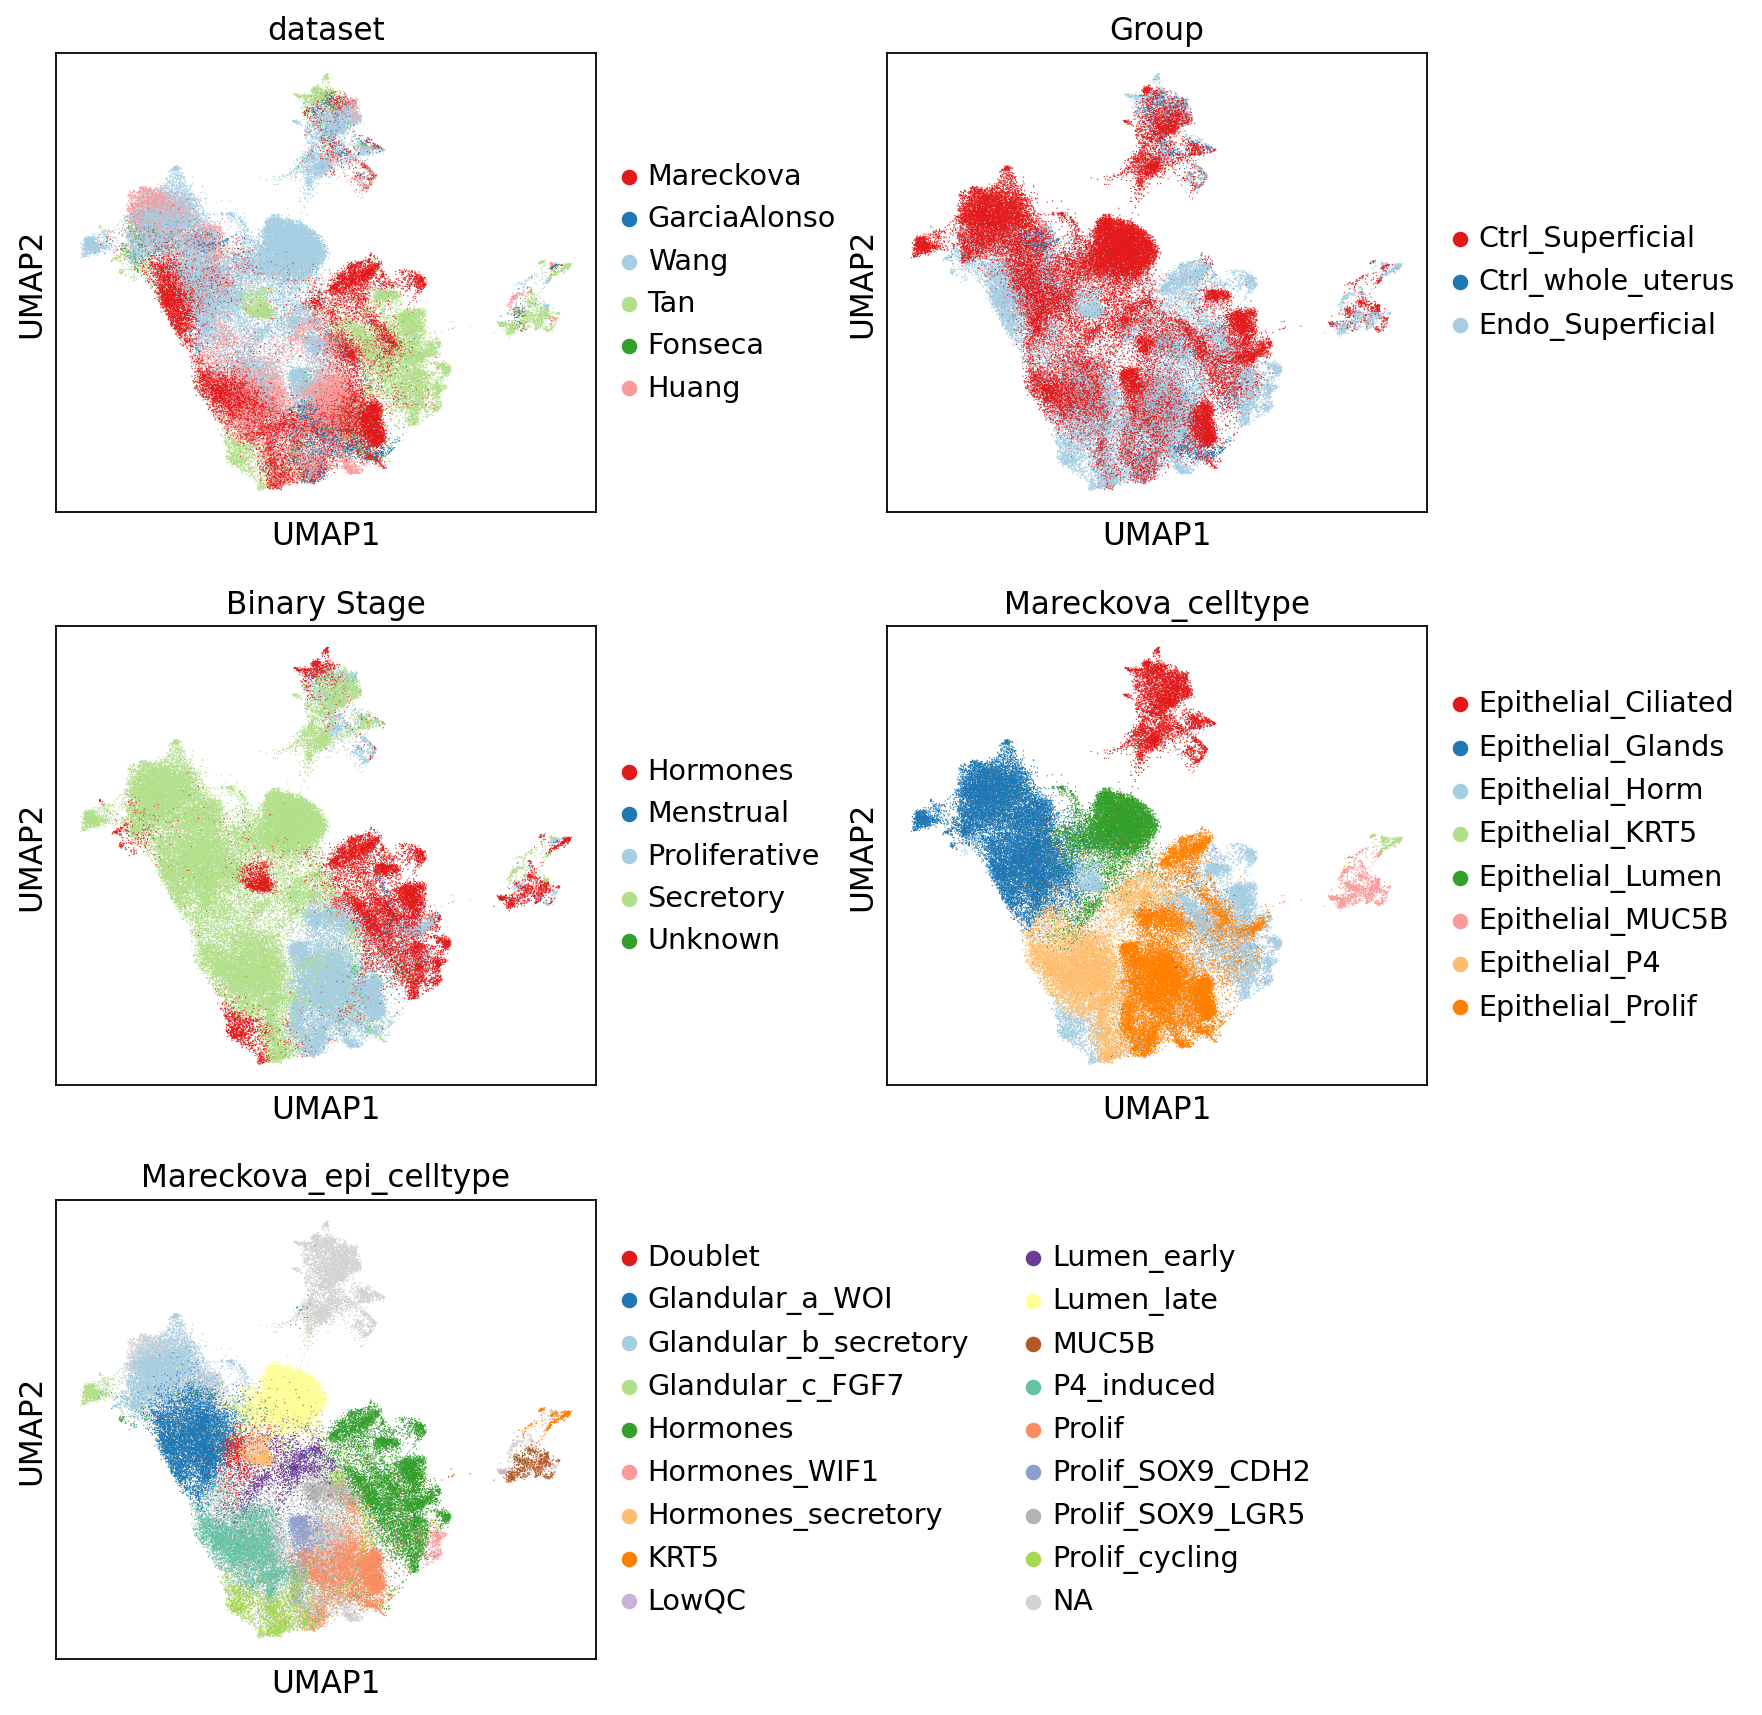

In [76]:
sc.pl.umap(
    adata,
    color=['dataset', 'Group', 'Binary Stage',  'Mareckova_celltype', 'Mareckova_epi_celltype'], 
    palette = palette,
    frameon=True, ncols = 2, wspace = 0.4
)

In [77]:
del adata.obs['Age']

In [78]:
adata.write('/nfs/team292/lg18/endometriosis/integrated_objects/cells_epithelial_CLEAN_integrated.h5ad')

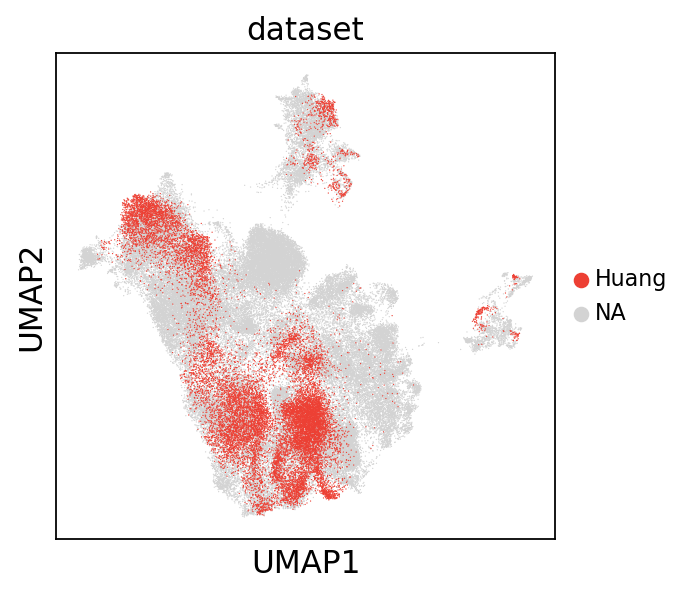

In [79]:
sc.pl.umap(adata,
        groups=['Huang'],
        color=['dataset'],
        palette=['#eb4034', '#ed4034'],
        frameon=True, legend_fontsize=10,
)

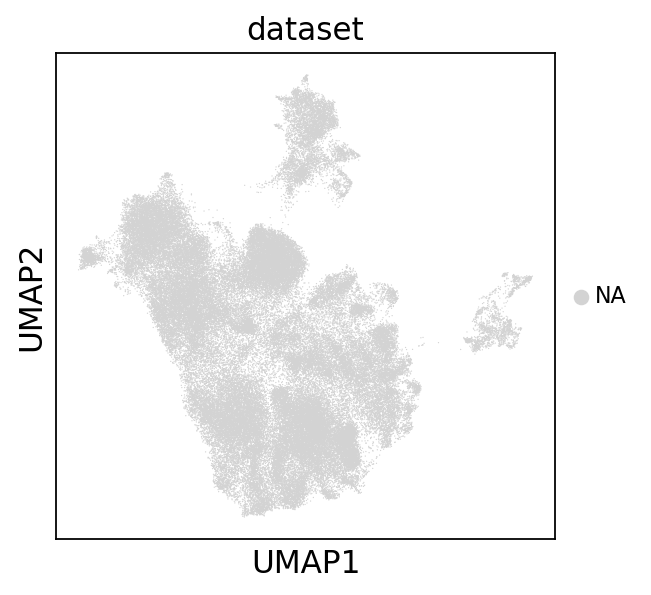

In [80]:
sc.pl.umap(adata,
        groups=['Lai'],
        color=['dataset'],
        palette=['#eb4034', '#ed4034'],
        frameon=True, legend_fontsize=10,
)

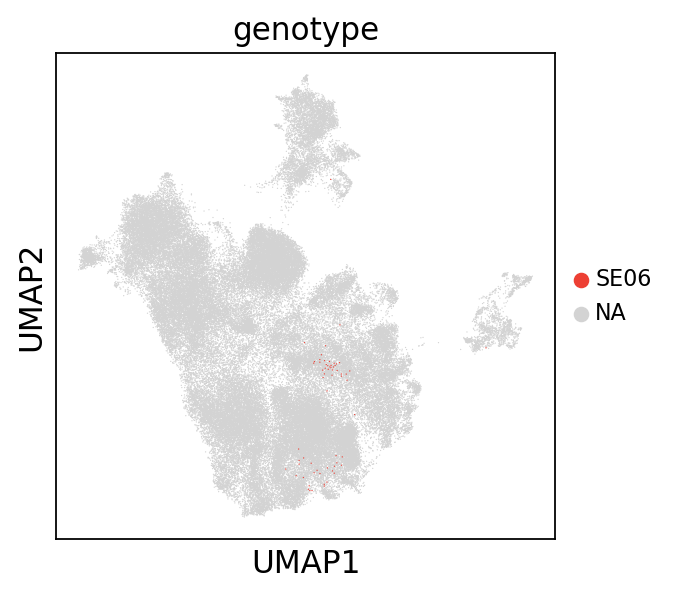

In [81]:
sc.pl.umap(adata,
        groups=['SE06'],
        color=['genotype'],
        palette=['#eb4034', '#ed4034'],
        frameon=True, legend_fontsize=10,
)